EXAMPLE 1: H2 Molecule Ground State Energy
Number of qubits: 2
Number of parameters: 6
Beginning optimization with: COBYLA
Optimization finished

Ground state energy: -1.857275 Ha
Exact ground state:  -1.857275 Ha
Optimal parameters: [2.79857033 1.37664428 6.21374982 5.66184831 0.34832951 4.32711757]


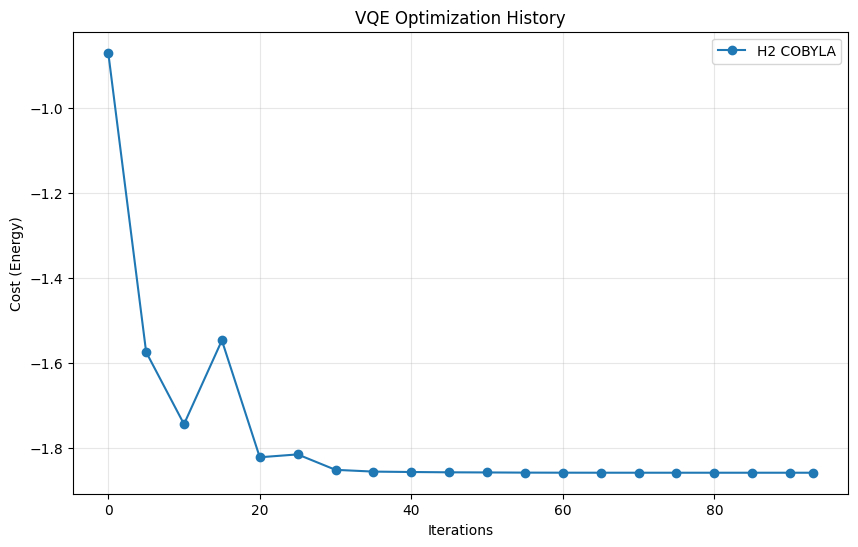

In [5]:
"""
VQE Solver Usage Examples
This notebook demonstrates various use cases of the VQESolver class
"""

import numpy as np
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from QUBO_VQE import VQESolver  # Import your class

# ============================================================================
# EXAMPLE 1: Simple H2 Molecule Ground State
# ============================================================================
print("=" * 70)
print("EXAMPLE 1: H2 Molecule Ground State Energy")
print("=" * 70)

# H2 molecule Hamiltonian (2 qubits)
# This is the Hamiltonian for H2 at equilibrium bond distance
h2_hamiltonian = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156)
])

# Create VQE solver
vqe_h2 = VQESolver()

# Set up the problem
vqe_h2.set_hamiltonian(h2_hamiltonian)
vqe_h2.set_ansatz_type('RealAmplitudes', reps=2)

print(f"Number of qubits: {vqe_h2.num_qubits}")
print(f"Number of parameters: {vqe_h2.check_num_parameters()}")

# Solve with COBYLA optimizer
optimal_params = vqe_h2.solve(
    maxiter=100,
    optimizer='COBYLA',
    callback_step_size=5  # Track every 5 iterations
)

# Get results
ground_energy = vqe_h2.compute_expectation(optimal_params)
print(f"\nGround state energy: {ground_energy:.6f} Ha")
print(f"Exact ground state:  -1.857275 Ha")
print(f"Optimal parameters: {optimal_params}")

# Plot optimization history
vqe_h2.plot_optimization_history(legend='H2 COBYLA')


EXAMPLE 2: 1D Ising Model with Transverse Field
Number of qubits: 3
Number of parameters: 24
Beginning optimization with: COBYLA
Optimization finished

Ground state energy: -2.376016

Sampling optimized state:
Top 5 measurement outcomes:
  111: 0.5350
  000: 0.3075
  110: 0.0444
  100: 0.0349
  011: 0.0318


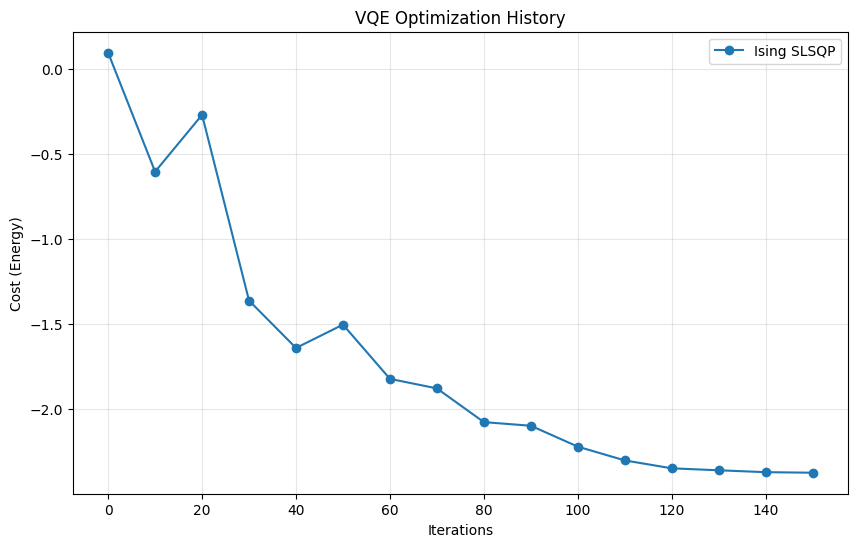

In [12]:
# ============================================================================
# EXAMPLE 2: Ising Model (Quantum Spin Chain)
# ============================================================================
print("\n" + "=" * 70)
print("EXAMPLE 2: 1D Ising Model with Transverse Field")
print("=" * 70)

def create_ising_hamiltonian(n_qubits, J=1.0, h=0.5):
    """
    Create 1D Ising model Hamiltonian: H = -J*sum(Z_i*Z_{i+1}) - h*sum(X_i)
    
    Args:
        n_qubits: Number of spins
        J: Coupling strength
        h: Transverse field strength
    """
    pauli_list = []
    
    # ZZ interactions (nearest neighbor)
    for i in range(n_qubits - 1):
        pauli_str = ['I'] * n_qubits
        pauli_str[i] = 'Z'
        pauli_str[i + 1] = 'Z'
        pauli_list.append((''.join(pauli_str), -J))
    
    # X transverse field
    for i in range(n_qubits):
        pauli_str = ['I'] * n_qubits
        pauli_str[i] = 'X'
        pauli_list.append((''.join(pauli_str), -h))
    
    return SparsePauliOp.from_list(pauli_list)

# Create 4-qubit Ising model
n_spins = 3
ising_ham = create_ising_hamiltonian(n_spins, J=1.0, h=0.5)

vqe_ising = VQESolver()
vqe_ising.set_hamiltonian(ising_ham)
vqe_ising.set_ansatz_type('EfficientSU2', reps=3)

print(f"Number of qubits: {n_spins}")
print(f"Number of parameters: {vqe_ising.check_num_parameters()}")

# Solve with SLSQP optimizer
ising_params = vqe_ising.solve(
    maxiter=150,
    optimizer='COBYLA',
    callback_step_size=10
)

ising_energy = vqe_ising.compute_expectation(ising_params)
print(f"\nGround state energy: {ising_energy:.6f}")

# Sample the optimized state
print("\nSampling optimized state:")
measurement_stats = vqe_ising.sample_circuit(ising_params)
print("Top 5 measurement outcomes:")
sorted_stats = sorted(measurement_stats.items(), key=lambda x: x[1], reverse=True)
for bitstring, prob in sorted_stats[:5]:
    print(f"  {bin(bitstring)[2:].zfill(n_spins)}: {prob:.4f}")

vqe_ising.plot_optimization_history(legend='Ising SLSQP')

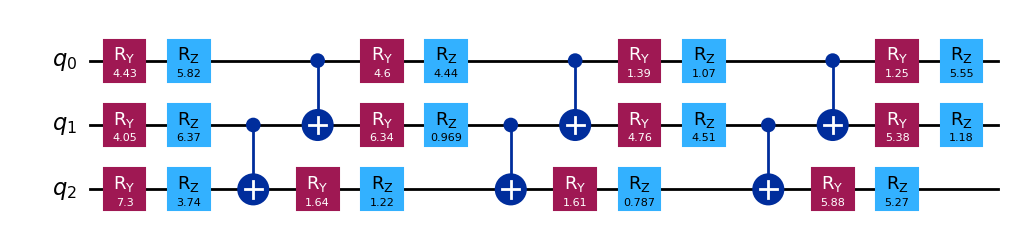

In [16]:
# Get the optimized circuit
circuit_to_save = vqe_ising.get_circuit(params=ising_params)
circuit_to_save.draw("mpl")